<a href="https://colab.research.google.com/github/SubhadipSen/AlmaBetter/blob/main/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
players = pd.read_excel('/content/drive/MyDrive/Cohort Himalaya/M1/Capstone Project/Copy of Players.xlsx')
deliveries = pd.read_csv('/content/drive/MyDrive/Cohort Himalaya/M1/Capstone Project/Copy of deliveries.csv')
matches = pd.read_csv('/content/drive/MyDrive/Cohort Himalaya/M1/Capstone Project/Copy of matches.csv', parse_dates = ['date'])
most_runs = pd.read_csv('/content/drive/MyDrive/Cohort Himalaya/M1/Capstone Project/Copy of most_runs_average_strikerate.csv')
teams = pd.read_csv('/content/drive/MyDrive/Cohort Himalaya/M1/Capstone Project/Copy of teams.csv')
home_away = pd.read_csv('/content/drive/MyDrive/Cohort Himalaya/M1/Capstone Project/Copy of teamwise_home_and_away.csv')

In [106]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 1 to 11415
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            179078 non-null  int64 
 1   batting_team      179078 non-null  object
 2   bowling_team      179078 non-null  object
 3   over              179078 non-null  int64 
 4   ball              179078 non-null  int64 
 5   batsman           179078 non-null  object
 6   non_striker       179078 non-null  object
 7   bowler            179078 non-null  object
 8   is_super_over     179078 non-null  int64 
 9   wide_runs         179078 non-null  int64 
 10  bye_runs          179078 non-null  int64 
 11  legbye_runs       179078 non-null  int64 
 12  noball_runs       179078 non-null  int64 
 13  penalty_runs      179078 non-null  int64 
 14  batsman_runs      179078 non-null  int64 
 15  extra_runs        179078 non-null  int64 
 16  total_runs        179078 non-null  int6

**Correlation between the boundaries and match winning over all the years**


In [4]:
deliveries.set_index('match_id',inplace = True)

In [5]:
matches['year'] = matches['date'].dt.year

In [6]:
#df = deliveries[deliveries['batsman_runs'] >= 4]
deliveries['year'] = ''
for i in matches['id']:
  deliveries.loc[i,'year'] = matches[matches['id'] == i]['year'].iloc[0]
  


In [7]:
deliveries

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,year
match_id,,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019
11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019
11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,2019


In [8]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017
2,3,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017
3,4,IPL-2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017
4,5,IPL-2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017


In [9]:
matches['year'] = matches['date'].dt.year
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017
2,3,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017
3,4,IPL-2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017
4,5,IPL-2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,2019
752,11412,IPL-2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,2019
753,11413,IPL-2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,2019
754,11414,IPL-2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,2019


In [10]:
most_runs.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [11]:
teams.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


In [12]:
home_away.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [13]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 1 to 11415
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            179078 non-null  int64 
 1   batting_team      179078 non-null  object
 2   bowling_team      179078 non-null  object
 3   over              179078 non-null  int64 
 4   ball              179078 non-null  int64 
 5   batsman           179078 non-null  object
 6   non_striker       179078 non-null  object
 7   bowler            179078 non-null  object
 8   is_super_over     179078 non-null  int64 
 9   wide_runs         179078 non-null  int64 
 10  bye_runs          179078 non-null  int64 
 11  legbye_runs       179078 non-null  int64 
 12  noball_runs       179078 non-null  int64 
 13  penalty_runs      179078 non-null  int64 
 14  batsman_runs      179078 non-null  int64 
 15  extra_runs        179078 non-null  int64 
 16  total_runs        179078 non-null  int6

In [14]:
my_list = []
for i in deliveries.year.unique():
  my_list.append(deliveries[deliveries['year'] == i])

In [15]:
my_list[0]

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,year
match_id,,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2,Rising Pune Supergiant,Mumbai Indians,20,2,MK Tiwary,SPD Smith,MG Johnson,0,0,0,0,0,0,0,0,0,MK Tiwary,caught,KA Pollard,2017
59,2,Rising Pune Supergiant,Mumbai Indians,20,3,SPD Smith,DT Christian,MG Johnson,0,0,0,0,0,0,0,0,0,SPD Smith,caught,AT Rayudu,2017
59,2,Rising Pune Supergiant,Mumbai Indians,20,4,Washington Sundar,DT Christian,MG Johnson,0,0,1,0,0,0,0,1,1,NaN,NaN,NaN,2017


In [16]:
list_of_dataframes = []
for i in my_list:
  rand_Data = i[['batting_team','batsman_runs']]
  rand_Data = pd.DataFrame(rand_Data[rand_Data['batsman_runs'] >= 4].value_counts('batting_team',ascending = False))
  rand_Data.rename({0:'No. of boundaries '},axis = 1, inplace = True)
  list_of_dataframes.append(rand_Data)


In [17]:
# dict_ = {}
# for i in matches['date'].dt.year.unique():
#   df = pd.DataFrame(matches[matches['date'].dt.year == i]['winner'].replace({'Mumbai Indians':"MI",
#                                                                              'Rising Pune Supergiant':"RPS",
#                                                                              'Rising Pune Supergiants':"RPS",
#                                                                              'Kolkata Knight Riders':"KKR",
#                                                                              'Sunrisers Hyderabad':"SRH",
#                                                                              'Kings XI Punjab':"KXIP",
#                                                                              'Delhi Daredevils':"DD",
#                                                                              'Gujarat Lions':"GL",
#                                                                              'Royal Challengers Bangalore':"RCB",
#                                                                              'Chennai Super Kings':"CSK",
#                                                                              'Rajasthan Royals':"RR",
#                                                                              'Delhi Capitals':"DC",
#                                                                              'Deccan Chargers': "DEC CH",
#                                                                              'Kochi Tuskers Kerala':"KTK",
#                                                                              'Pune Warriors':"PW"}).value_counts())
#   dict_[i] = {}
#   for k in df.index:
#     if k not in list(dict_[i].keys()):
#       dict_[i][k] = df.loc[k,'winner']

In [18]:
dict_ = {}
for i in matches['date'].dt.year.unique():
  df = pd.DataFrame(matches[matches['date'].dt.year == i]['winner'].value_counts())
  dict_[i] = {}
  for k in df.index:
    if k not in list(dict_[i].keys()):
      dict_[i][k] = df.loc[k,'winner']

In [19]:
no_of_times_won = pd.DataFrame(dict_).fillna(0)

In [20]:
no_of_times_won

,2017,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018,2019
Mumbai Indians,12.0,7.0,5.0,11.0,10.0,10.0,13.0,7.0,10.0,7.0,6.0,11.0
Rising Pune Supergiant,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kolkata Knight Riders,9.0,6.0,3.0,7.0,8.0,12.0,6.0,11.0,7.0,8.0,9.0,6.0
Sunrisers Hyderabad,8.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0,11.0,10.0,6.0
Kings XI Punjab,7.0,10.0,7.0,4.0,7.0,8.0,8.0,12.0,3.0,4.0,6.0,6.0
Delhi Daredevils,6.0,7.0,10.0,7.0,4.0,11.0,3.0,2.0,5.0,7.0,5.0,0.0
Gujarat Lions,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
Royal Challengers Bangalore,3.0,4.0,9.0,8.0,10.0,8.0,9.0,5.0,8.0,9.0,6.0,5.0
Rajasthan Royals,0.0,13.0,6.0,6.0,6.0,7.0,11.0,7.0,7.0,0.0,7.0,5.0
Chennai Super Kings,0.0,9.0,8.0,9.0,11.0,10.0,12.0,10.0,10.0,0.0,11.0,10.0


In [21]:
list_of_dataframes[1]

,No. of boundaries
batting_team,
Rajasthan Royals,344
Chennai Super Kings,330
Kings XI Punjab,327
Deccan Chargers,299
Mumbai Indians,275
Delhi Daredevils,272
Royal Challengers Bangalore,246
Kolkata Knight Riders,239


In [22]:
# var = 0
# any_list = list(no_of_times_won.columns)
# for i in list_of_dataframes:
#   k = list(no_of_times_won.index.difference(i.index))
#   zzzz = no_of_times_won.drop(k)
#   list_of_dataframes[var] = pd.concat([list_of_dataframes[var] , zzzz[any_list[var]]], axis = 1)
#   var = var + 1

In [31]:
a = 0
corr_list = []
for i in no_of_times_won.columns:
  boun_vs_win = pd.concat([no_of_times_won[i],list_of_dataframes[a]],axis = 1).dropna()
  a = a + 1
  corr_list.append(boun_vs_win.corr().iloc[0,1])

In [32]:
corr_list

[0.6888867001346102,
 0.6771792297603827,
 0.76988348521086,
 0.585890794274637,
 0.6871853347569103,
 0.6418614386265611,
 0.7267834687991997,
 0.8465560955182253,
 0.8982436218917766,
 0.7230825406934797,
 0.6944510170746169,
 0.6033902605784218]

In [34]:
empty_dict = {}
a = 0
for i in no_of_times_won.columns:
  empty_dict[i] = corr_list[a]
  a = a + 1

In [35]:
empty_dict

{2008: 0.6771792297603827,
 2009: 0.76988348521086,
 2010: 0.585890794274637,
 2011: 0.6871853347569103,
 2012: 0.6418614386265611,
 2013: 0.7267834687991997,
 2014: 0.8465560955182253,
 2015: 0.8982436218917766,
 2016: 0.7230825406934797,
 2017: 0.6888867001346102,
 2018: 0.6944510170746169,
 2019: 0.6033902605784218}

([<matplotlib.axis.YTick at 0x7fb675e52290>,
 <a list of 10 Text major ticklabel objects>)

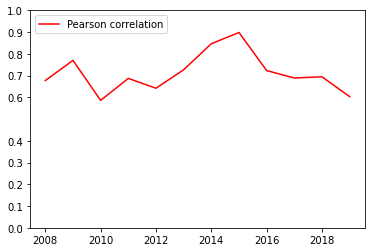

In [60]:
pd.DataFrame([empty_dict]).T.rename({0:'Pearson correlation'}, axis = 1).sort_index().plot(kind = 'line',color = 'r')
plt.yticks([round(i,1) for i in np.linspace(0,1,10)]) # Correlation between the boundaries and match winning over all the years

**Correlation of overall run rates with the match winning of individual teams**


In [63]:
my_list[0].groupby('batting_team')['total_runs'].sum()

batting_team
Delhi Daredevils               2219
Gujarat Lions                  2412
Kings XI Punjab                2207
Kolkata Knight Riders          2484
Mumbai Indians                 2800
Rising Pune Supergiant         2470
Royal Challengers Bangalore    1845
Sunrisers Hyderabad            2349
Name: total_runs, dtype: int64

In [76]:
emp_list = []
for i in my_list:
  x = pd.DataFrame(i[['batting_team']].reset_index().drop_duplicates().value_counts('batting_team')).rename({0:'matches_played'},axis = 1)
  y = pd.DataFrame(i.groupby('batting_team')['total_runs'].sum().rename({0:'runs_made'},axis = 1))
  emp_list.append(pd.concat([x,y],axis = 1))


In [81]:
emp_list[0]

,runrate
Mumbai Indians,8.235294
Rising Pune Supergiant,7.718750
Kolkata Knight Riders,7.762500
Sunrisers Hyderabad,8.389286
Kings XI Punjab,7.882143
Gujarat Lions,8.614286
Delhi Daredevils,7.925000
Royal Challengers Bangalore,7.096154


In [80]:
for i in range(len(emp_list)):
  emp_list[i]['runrate'] = emp_list[i]['total_runs']/(emp_list[i]['matches_played']*20)
  emp_list[i].drop(['matches_played','total_runs'],axis = 1,inplace = True)

In [82]:
b = 0
co_list = []
for i in no_of_times_won.columns:
  runrate_vs_win = pd.concat([no_of_times_won[i],emp_list[b]],axis = 1).dropna()
  b = b + 1
  co_list.append(runrate_vs_win.corr().iloc[0,1])

In [83]:
co_list

[0.22553379817627514,
 0.5509361985927862,
 0.4127795539764579,
 0.2958513389118272,
 0.41135138121692133,
 -0.14987393101527524,
 0.5699649055471903,
 0.8257982042815316,
 0.6245621609204144,
 0.405052704523155,
 0.32626420603554185,
 -0.27408458060958313]

In [84]:
e_dict = {}
c = 0
for i in no_of_times_won.columns:
  e_dict[i] = co_list[c]
  c = c + 1

In [85]:
e_dict

{2008: 0.5509361985927862,
 2009: 0.4127795539764579,
 2010: 0.2958513389118272,
 2011: 0.41135138121692133,
 2012: -0.14987393101527524,
 2013: 0.5699649055471903,
 2014: 0.8257982042815316,
 2015: 0.6245621609204144,
 2016: 0.405052704523155,
 2017: 0.22553379817627514,
 2018: 0.32626420603554185,
 2019: -0.27408458060958313}

([<matplotlib.axis.YTick at 0x7fb675a7c110>,
 <a list of 10 Text major ticklabel objects>)

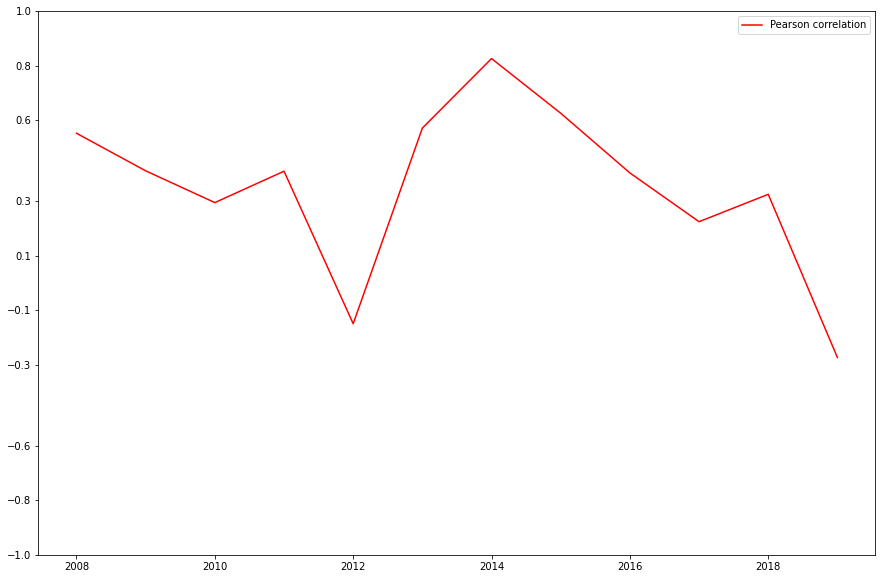

In [102]:
pd.DataFrame([e_dict]).T.rename({0:'Pearson correlation'},axis = 1).sort_index().plot(kind = 'line',color = 'r',figsize=(15,10))
plt.yticks([round(i,1) for i in np.linspace(-1,1,10)])